In [5]:
from classifier import *
from gan import *
from synthetic_data_generation import *
from data_analysis import *

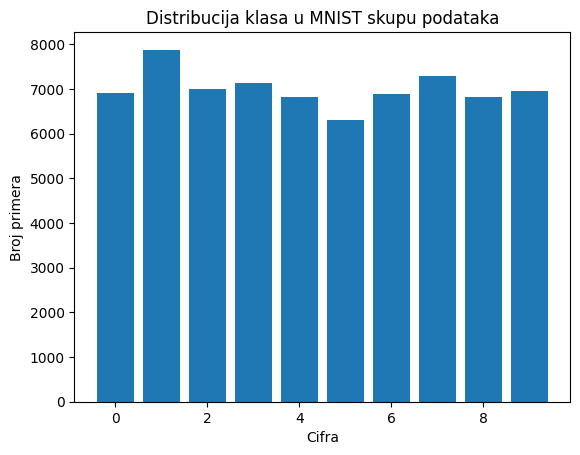

In [6]:
    analyze_class_distribution()

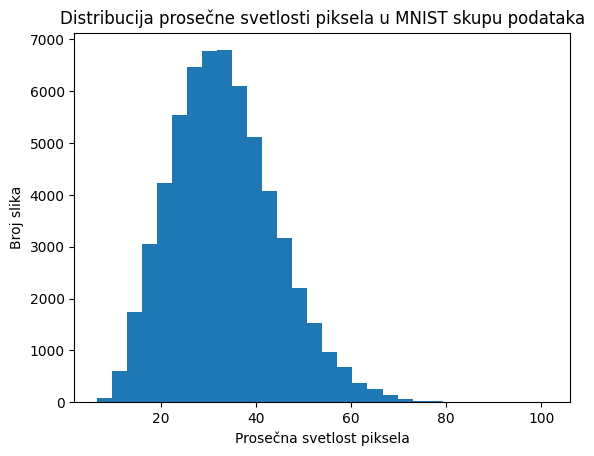

In [7]:
    calc_avg_pixel_brightness()

D:\Ognjenov Folder\Fx\Master\ML\GAN-Based-Image-Data-Augmentation\synthetic_data_generation.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gan: GAN = torch.load(model_

Generated 1000 images with label 0.


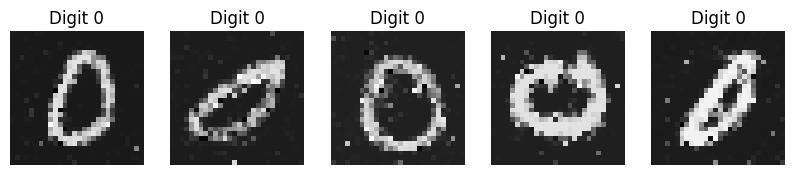

Generated 1000 images with label 1.


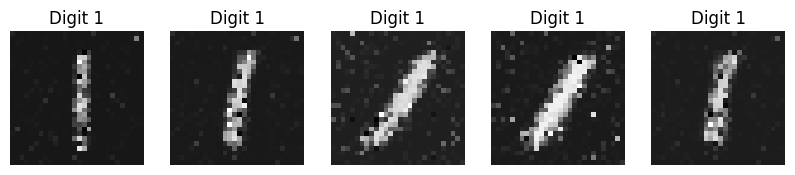

Generated 1000 images with label 2.


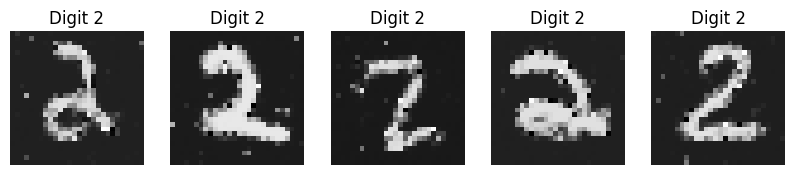

Generated 1000 images with label 3.


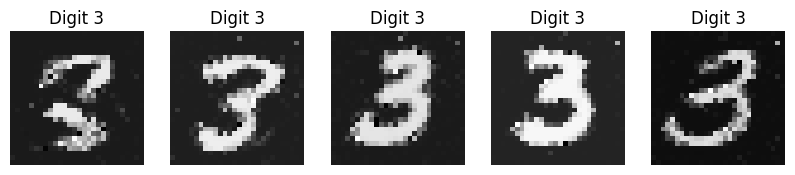

Generated 1000 images with label 4.


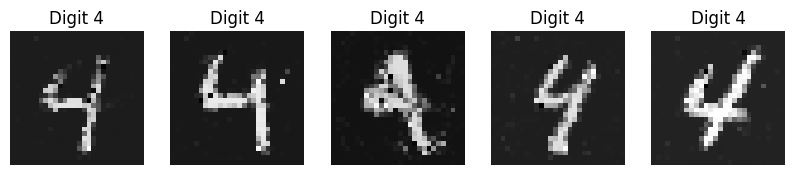

Generated 1000 images with label 5.


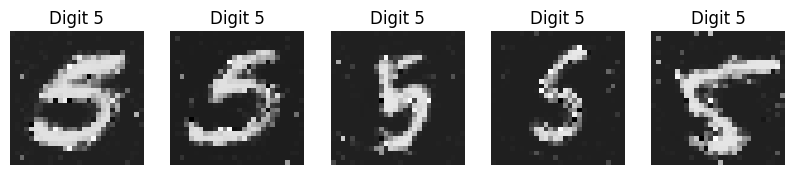

Generated 1000 images with label 6.


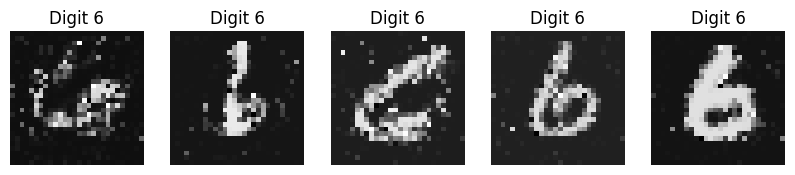

Generated 1000 images with label 7.


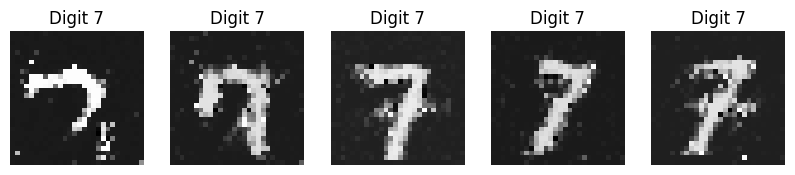

Generated 1000 images with label 8.


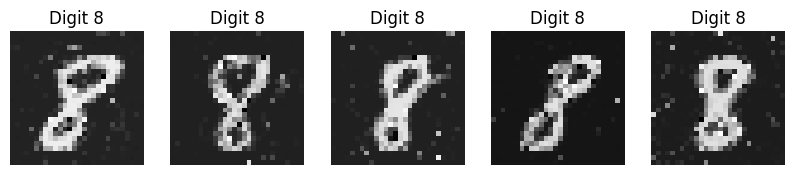

Generated 1000 images with label 9.


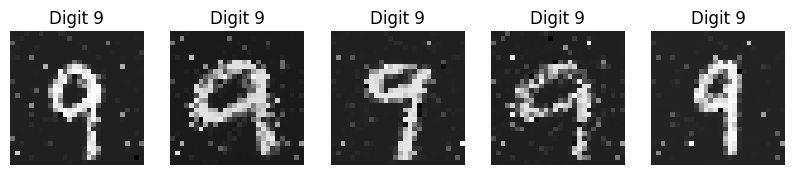

Training classifier for -1 ratio of custom data and MNIST data.
Best classifier accuracy: 0.7975999712944031.
Training classifier for 0 ratio of custom data and MNIST data.
Best classifier accuracy: 0.9501000046730042.
Training classifier for 0.25 ratio of custom data and MNIST data.
Best classifier accuracy: 0.5164999961853027.
Training classifier for 0.5 ratio of custom data and MNIST data.
Best classifier accuracy: 0.6468999981880188.
Training classifier for 1 ratio of custom data and MNIST data.
Best classifier accuracy: 0.6402000188827515.
Training classifier for 2 ratio of custom data and MNIST data.
Best classifier accuracy: 0.7364000082015991.
Training classifier for 4 ratio of custom data and MNIST data.
Best classifier accuracy: 0.7574999928474426.
Classifier statistic for -1 of custom data.


C:\Users\Ognjen\AppData\Local\Temp\ipykernel_14532\3912192586.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  custom_data_ratios_to_classifiers[ratio] = torch.load(f'sa

Test Accuracy: 79.76%
F1 Score: 0.8068
Precision: 0.8565
Recall: 0.7976

Classification Report:
               precision    recall  f1-score   support

           0     0.9252    0.9592    0.9419       980
           1     0.9921    0.6661    0.7970      1135
           2     0.8684    0.8246    0.8459      1032
           3     0.7335    0.8802    0.8002      1010
           4     0.8427    0.8727    0.8574       982
           5     0.9508    0.5415    0.6900       892
           6     0.9644    0.8194    0.8860       958
           7     0.9659    0.7986    0.8743      1028
           8     0.4432    0.9302    0.6004       974
           9     0.8632    0.6819    0.7619      1009

    accuracy                         0.7976     10000
   macro avg     0.8549    0.7974    0.8055     10000
weighted avg     0.8565    0.7976    0.8068     10000



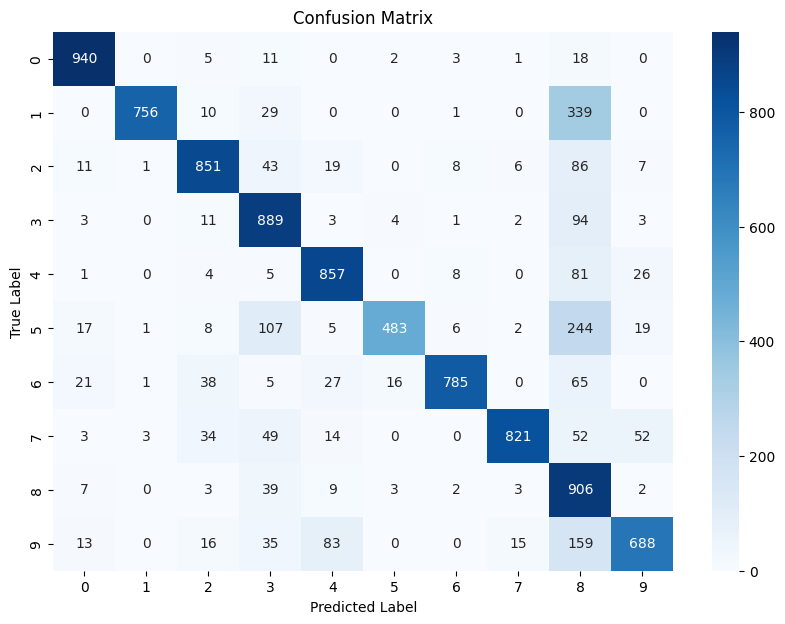

Classifier statistic for 0 of custom data.
Test Accuracy: 95.01%
F1 Score: 0.9500
Precision: 0.9500
Recall: 0.9501

Classification Report:
               precision    recall  f1-score   support

           0     0.9610    0.9806    0.9707       980
           1     0.9773    0.9859    0.9816      1135
           2     0.9531    0.9457    0.9494      1032
           3     0.9415    0.9406    0.9411      1010
           4     0.9463    0.9511    0.9487       982
           5     0.9406    0.9226    0.9315       892
           6     0.9421    0.9509    0.9465       958
           7     0.9473    0.9436    0.9454      1028
           8     0.9423    0.9384    0.9403       974
           9     0.9439    0.9346    0.9392      1009

    accuracy                         0.9501     10000
   macro avg     0.9495    0.9494    0.9494     10000
weighted avg     0.9500    0.9501    0.9500     10000



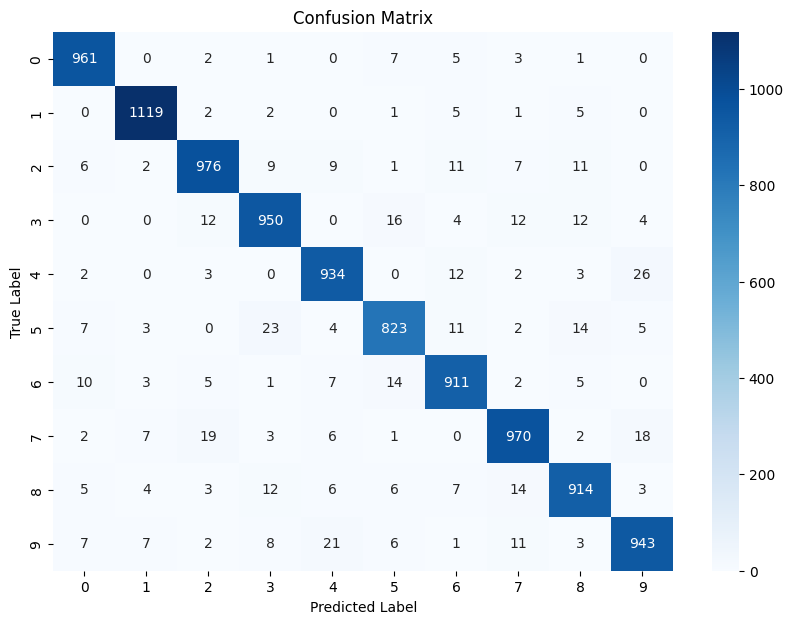

Classifier statistic for 0.25 of custom data.
Test Accuracy: 51.65%
F1 Score: 0.4528
Precision: 0.7555
Recall: 0.5165

Classification Report:
               precision    recall  f1-score   support

           0     0.7690    0.9816    0.8624       980
           1     0.3119    0.9974    0.4752      1135
           2     0.6865    0.7151    0.7005      1032
           3     0.9967    0.2970    0.4577      1010
           4     0.9836    0.0611    0.1151       982
           5     0.6811    0.7567    0.7169       892
           6     1.0000    0.1315    0.2325       958
           7     0.4046    0.8804    0.5544      1028
           8     1.0000    0.0144    0.0283       974
           9     0.8032    0.2507    0.3822      1009

    accuracy                         0.5165     10000
   macro avg     0.7637    0.5086    0.4525     10000
weighted avg     0.7555    0.5165    0.4528     10000



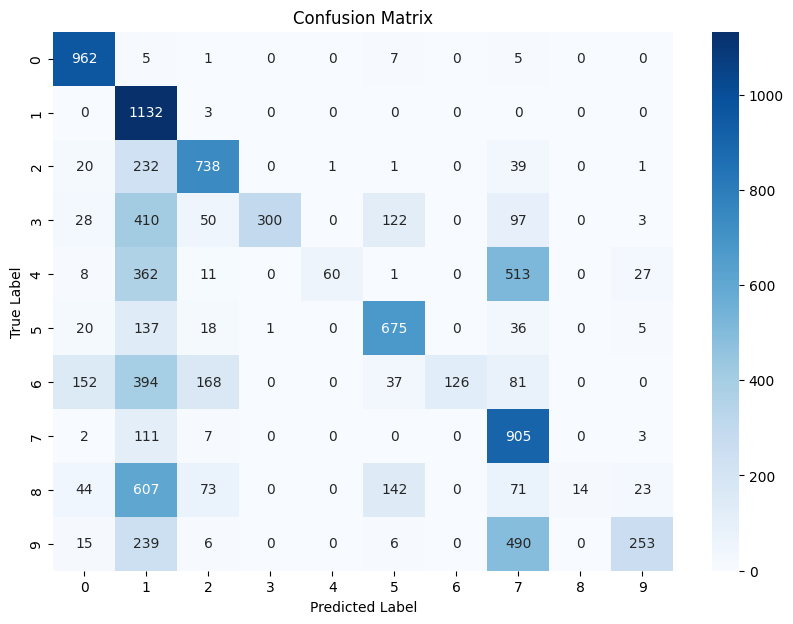

Classifier statistic for 0.5 of custom data.
Test Accuracy: 64.69%
F1 Score: 0.6115
Precision: 0.7972
Recall: 0.6469

Classification Report:
               precision    recall  f1-score   support

           0     0.8150    0.9663    0.8842       980
           1     0.6776    0.9850    0.8029      1135
           2     0.3868    0.9564    0.5508      1032
           3     0.4852    0.9416    0.6404      1010
           4     0.9840    0.4379    0.6061       982
           5     0.8693    0.4473    0.5907       892
           6     0.9843    0.1962    0.3272       958
           7     0.8962    0.7899    0.8397      1028
           8     1.0000    0.0585    0.1106       974
           9     0.9265    0.5748    0.7095      1009

    accuracy                         0.6469     10000
   macro avg     0.8025    0.6354    0.6062     10000
weighted avg     0.7972    0.6469    0.6115     10000



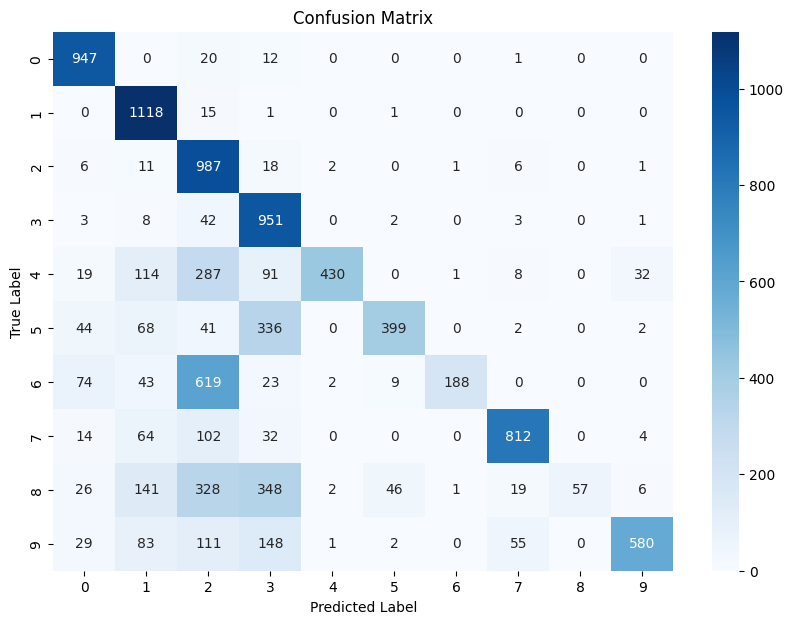

Classifier statistic for 1 of custom data.
Test Accuracy: 64.02%
F1 Score: 0.5894
Precision: 0.7877
Recall: 0.6402

Classification Report:
               precision    recall  f1-score   support

           0     0.7563    0.9786    0.8532       980
           1     0.8516    0.9709    0.9074      1135
           2     0.6107    0.9060    0.7296      1032
           3     0.4277    0.9693    0.5935      1010
           4     0.4584    0.9705    0.6227       982
           5     0.9487    0.2904    0.4446       892
           6     1.0000    0.2756    0.4321       958
           7     0.9401    0.6712    0.7832      1028
           8     1.0000    0.2002    0.3336       974
           9     0.9041    0.0654    0.1220      1009

    accuracy                         0.6402     10000
   macro avg     0.7898    0.6298    0.5822     10000
weighted avg     0.7877    0.6402    0.5894     10000



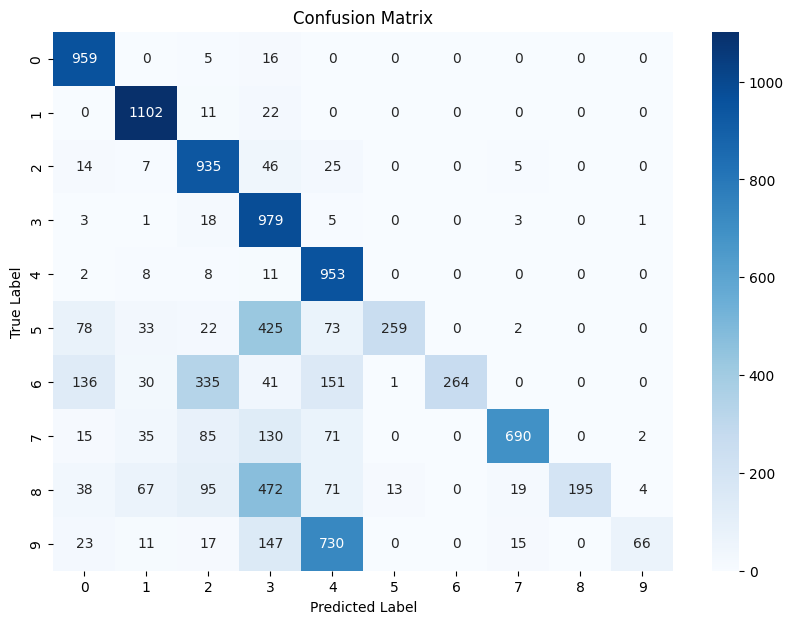

Classifier statistic for 2 of custom data.
Test Accuracy: 73.64%
F1 Score: 0.6872
Precision: 0.8194
Recall: 0.7364

Classification Report:
               precision    recall  f1-score   support

           0     0.9038    0.9684    0.9350       980
           1     0.9519    0.9419    0.9469      1135
           2     0.7611    0.9109    0.8293      1032
           3     0.6197    0.9356    0.7456      1010
           4     0.5626    0.9470    0.7059       982
           5     0.5116    0.8890    0.6495       892
           6     0.9313    0.8914    0.9109       958
           7     0.9200    0.6936    0.7909      1028
           8     1.0000    0.0975    0.1777       974
           9     0.9870    0.0753    0.1400      1009

    accuracy                         0.7364     10000
   macro avg     0.8149    0.7351    0.6832     10000
weighted avg     0.8194    0.7364    0.6872     10000



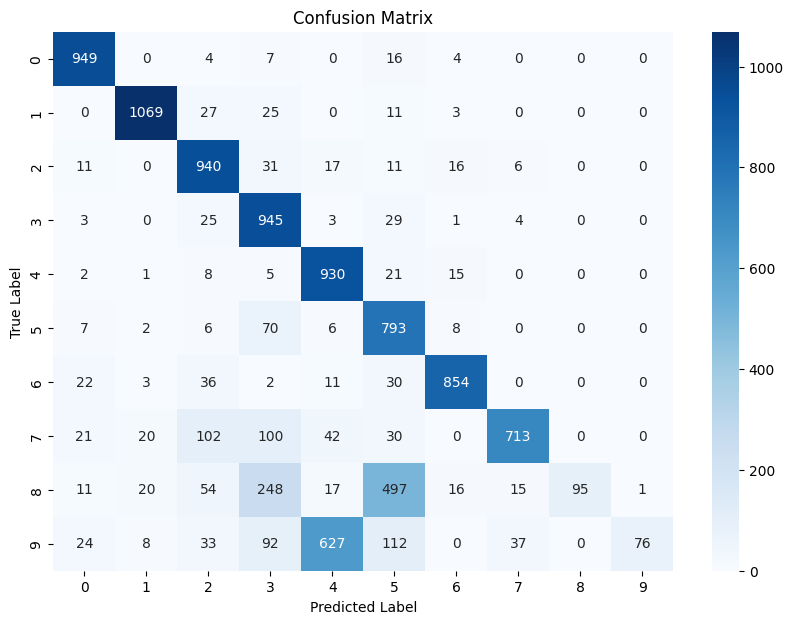

Classifier statistic for 4 of custom data.
Test Accuracy: 75.75%
F1 Score: 0.7009
Precision: 0.8194
Recall: 0.7575

Classification Report:
               precision    recall  f1-score   support

           0     0.9330    0.9663    0.9494       980
           1     0.9603    0.9586    0.9594      1135
           2     0.8193    0.8963    0.8561      1032
           3     0.7116    0.9208    0.8028      1010
           4     0.5904    0.9674    0.7333       982
           5     0.5739    0.8834    0.6958       892
           6     0.9385    0.8758    0.9060       958
           7     0.6904    0.9329    0.7935      1028
           8     1.0000    0.1191    0.2128       974
           9     0.9429    0.0327    0.0632      1009

    accuracy                         0.7575     10000
   macro avg     0.8160    0.7553    0.6972     10000
weighted avg     0.8194    0.7575    0.7009     10000



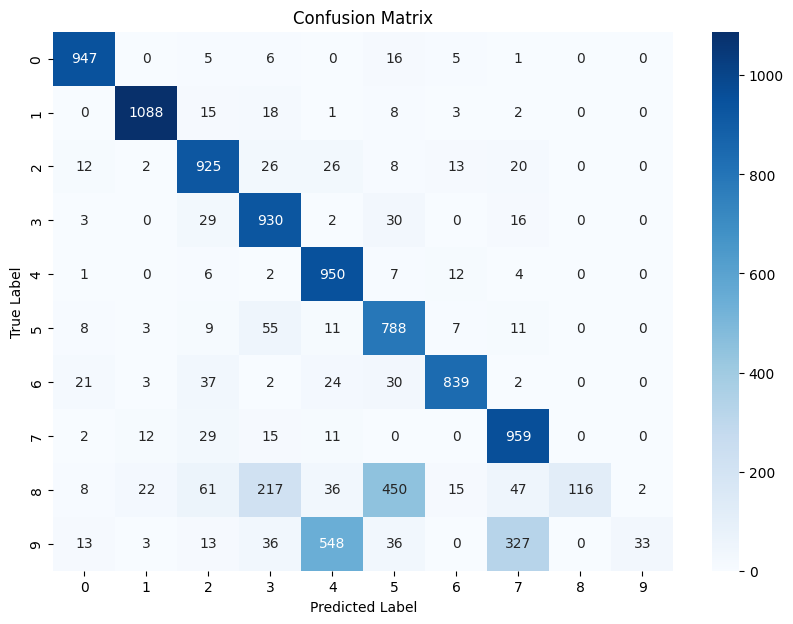

In [8]:
    images, labels = generate_synthetic_data()

    custom_data_ratios_to_classifiers = {-1: None, 0: None, 0.25: None, 0.5: None, 1: None, 2: None, 4: None}
    for ratio in custom_data_ratios_to_classifiers.keys():
        print(f'Training classifier for {ratio} ratio of custom data and MNIST data.')
        if not os.path.exists(f'saved_models/classifier_{ratio}.pth'): 
            max_acc = 0
            for _ in range(5):
                classifier = MNISTClassifier(lr=0.001, input_dim=784, output_dim=10, hidden_dim=300, dropout_rate=0.1)
                #train_loader, validation_loader, test_loader = classifier.load_and_preprocess_data(validation_split=0.2)
                train_loader, validation_loader, test_loader = classifier.load_and_preprocess_data(train_data=images, train_labels=labels, validation_split=0.2, custom_data_ratio=ratio)
                classifier.train_model(train_loader=train_loader, validation_loader=validation_loader, num_epochs=200)

                _, _ = classifier.evaluate_model(test_loader)
                if classifier.acc > max_acc:
                    custom_data_ratios_to_classifiers[ratio] = classifier
                    max_acc = classifier.acc
            torch.save(custom_data_ratios_to_classifiers[ratio], f'saved_models/classifier_{ratio}.pth')
        else:
            custom_data_ratios_to_classifiers[ratio] = torch.load(f'saved_models/classifier_{ratio}.pth')
        print(f'Best classifier accuracy: {custom_data_ratios_to_classifiers[ratio].acc}.')

    for ratio, classifier in custom_data_ratios_to_classifiers.items():
        print(f'Classifier statistic for {ratio} of custom data.')
        true_labels, pred_labels = classifier.evaluate_model(test_loader)
        classifier.plot_confusion_matrix(true_labels, pred_labels)